# Steps for Sentiment Analysis

**Sources**
* https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
* https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
* https://medium.com/@rahulvaish/vader-and-sentiment-analysis-python-eae70ecef454

</br>

1. ~Get data~
2. ~Remove twitter handles~
4. ~Remove links~
5. ~Remove special characters, numbers, punctuations (except !)~
4. ~Remove short words~
5. ~Tokenize data~
6. ~Stemming data~
7. ~WordCloud~
8. ~Hashtag Counts~
8. ~Calculate polarity~
9. ~Calculate mentions~
10. ~Plot bar chart for mentions and polarity~

In [3]:
# Get Data
!pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import *
from wordcloud import WordCloud

url = 'https://raw.githubusercontent.com/ariessa/Datasets/master/textblob_tweets_premium_30_days.csv?token=ACQXPIYLDDYW7VDTFAHY4525TLQNW'
data = pd.read_csv(url)

data.sort_values(by=['Date'])

,Author,Content,Date,Url,Followers
99,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Fri Sep 06 01:33:45 +0000 2019,"[{'url': 'https://t.co/G4acitvjII', 'expanded_...",17
98,myhellogold,Don’t miss the opportunity to start building y...,Fri Sep 06 11:00:00 +0000 2019,"[{'url': 'https://t.co/IBj8UdeRAr', 'expanded_...",1202
97,adibkhld,RT @myhellogold: Don’t miss the opportunity to...,Fri Sep 06 11:01:30 +0000 2019,[],5772
96,AppletonDave,RT @myhellogold: Don’t miss the opportunity to...,Fri Sep 06 11:59:04 +0000 2019,[],1203
95,rcfl1967,RT @myhellogold: Don’t miss the opportunity to...,Fri Sep 06 16:36:26 +0000 2019,[],364
94,itsme_aideal,InsyaAllah anda boleh. Beli / Simpan emas deng...,Fri Sep 13 06:54:27 +0000 2019,"[{'url': 'https://t.co/pSSLlFSrgd', 'expanded_...",2050
93,tiwazawat,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Fri Sep 13 07:02:49 +0000 2019,"[{'url': 'https://t.co/U4fNs9R8wy', 'expanded_...",2
92,AppletonDave,RT @myhellogold: #EmaszingMalaysian stories. T...,Fri Sep 13 11:01:11 +0000 2019,[],1203
91,72PaSu,"@virginiaraggi @Roma 2 anni fa HelloGold, star...",Fri Sep 13 11:30:24 +0000 2019,"[{'url': 'https://t.co/pjVQ0JBoEO', 'expanded_...",10
90,surayaror,Have you read this #ringgitohringgit article y...,Mon Sep 09 04:27:13 +0000 2019,"[{'url': 'https://t.co/bg18Sq3TDi', 'expanded_...",7789


In [0]:
# Remove pattern function
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [0]:
# Remove emoticons from column 'Author'
data['Author'] = data['Author'].str.replace("[^\w()'+]", " ")
data

,Author,Content,Date,Url,Followers
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452
5,AppletonDave,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 08:13:15 +0000 2019,[],1203
6,myhellogold,We sat down with our friends from MyPF and tal...,Wed Sep 04 07:00:00 +0000 2019,"[{'url': 'https://t.co/wvCrjLtG8v', 'expanded_...",1202
7,BabySag1981,Download the HelloGold app. Make a purchase of...,Tue Sep 17 09:09:10 +0000 2019,"[{'url': 'https://t.co/zLdjDNTTH7', 'expanded_...",208
8,AltinaDair,2/2\nBiggest Gainers \ Top 5\n # Name ...,Tue Sep 10 17:20:21 +0000 2019,"[{'url': 'https://t.co/W1OUUqcBjF', 'expanded_...",447
9,rcfl1967,RT @myhellogold: #EmaszingMalaysian stories. T...,Tue Sep 10 16:56:05 +0000 2019,[],364


In [0]:
# Remove Twitter Handles
data['Tidy_Content'] = np.vectorize(remove_pattern)(data['Content'], "@[\w]*")
data.head()

,Author,Content,Date,Url,Followers,Tidy_Content
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,"Molto interessati? A casa loro, le stesse macc..."
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,Muat turun aplikasi HelloGold. Buat pembelian...
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,RT : We sat down with our friends from MyPF an...
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,Muat turun aplikasi HelloGold sekarang. Buat p...


In [0]:
# Remove links
data['Tidy_Content'] = data['Tidy_Content'].str.replace("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ")
data.head()

# text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

,Author,Content,Date,Url,Followers,Tidy_Content
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,"Molto interessati? A casa loro, le stesse macc..."
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,Muat turun aplikasi HelloGold. Buat pembelian...
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,RT : We sat down with our friends from MyPF an...
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,Muat turun aplikasi HelloGold sekarang. Buat p...


In [0]:
# Remove special characters, numbers, punctuations (except exclamation mark)
data['Tidy_Content'] = data['Tidy_Content'].str.replace("[^a-zA-Z#!]", " ")
data.head()

,Author,Content,Date,Url,Followers,Tidy_Content
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,HelloGold ...
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,Molto interessati A casa loro le stesse macc...
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,Muat turun aplikasi HelloGold Buat pembelian...
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,RT We sat down with our friends from MyPF an...
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,Muat turun aplikasi HelloGold sekarang Buat p...


In [0]:
# Remove short words
data['Tidy_Content'] = data['Tidy_Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
data.head()

,Author,Content,Date,Url,Followers,Tidy_Content
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,HelloGold XXXX
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,Molto interessati casa loro stesse macchinette...
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,Muat turun aplikasi HelloGold Buat pembelian e...
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,down with friends from MyPF talked about gold ...
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,Muat turun aplikasi HelloGold sekarang Buat pe...


In [0]:
# Tokenize Data
tokenize_tweets = data['Tidy_Content'].apply(lambda x: x.split()) 
tokenize_tweets.head()

0                                    [HelloGold, XXXX]
1    [Molto, interessati, casa, loro, stesse, macch...
2    [Muat, turun, aplikasi, HelloGold, Buat, pembe...
3    [down, with, friends, from, MyPF, talked, abou...
4    [Muat, turun, aplikasi, HelloGold, sekarang, B...
Name: Tidy_Content, dtype: object

In [0]:
# Stemming Data

stemmer = PorterStemmer()

tokenize_tweets = tokenize_tweets.apply(lambda x: [stemmer.stem(i) for i in x])
tokenize_tweets.head()

0                                    [hellogold, xxxx]
1    [molto, interessati, casa, loro, stess, macchi...
2    [muat, turun, aplikasi, hellogold, buat, pembe...
3    [down, with, friend, from, mypf, talk, about, ...
4    [muat, turun, aplikasi, hellogold, sekarang, b...
Name: Tidy_Content, dtype: object

In [0]:
for i in range(len(tokenize_tweets)):
  tokenize_tweets[i] = ' '.join(tokenize_tweets[i])

data['Tidy_Content'] = tokenize_tweets
data.head()

,Author,Content,Date,Url,Followers,Tidy_Content
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,hellogold xxxx
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,molto interessati casa loro stess macchinett q...
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,muat turun aplikasi hellogold buat pembelian e...
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,down with friend from mypf talk about gold hel...
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,muat turun aplikasi hellogold sekarang buat pe...


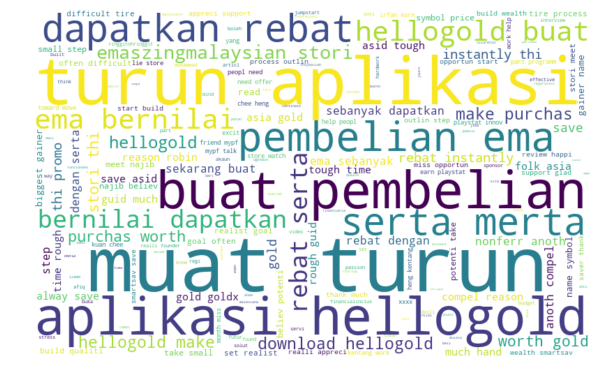

In [0]:
# WordCloud
all_words = ' '.join([text for text in data['Tidy_Content']])

wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white',  max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
# Hashtags mentions

def hashtag_extract(x):
  hashtags = []
  
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    
  return hashtags

# Extract hashtags

hashtags = hashtag_extract(data['Tidy_Content'])

# Unnesting list

hashtags = sum(hashtags, [])

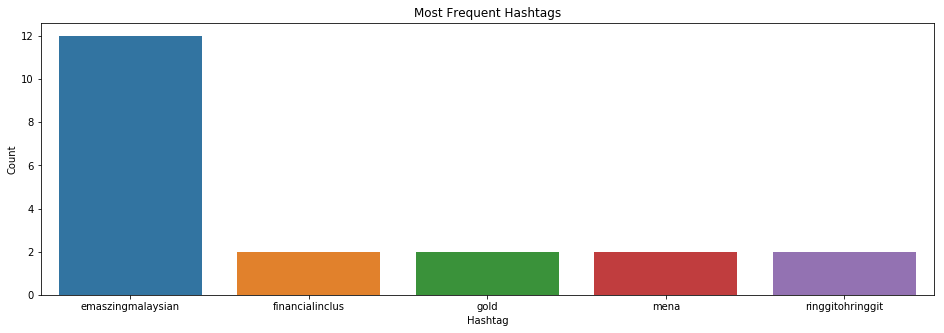

In [0]:
# Frequency Distribution

freq_dist = nltk.FreqDist(hashtags)

graph = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

# Top 10 Most Frequent Hashtags

graph = graph.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=graph, x="Hashtag", y="Count")
axis.set(ylabel='Count')
plt.title('Most Frequent Hashtags')
plt.show()

In [0]:
# Calculate Polarity

analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in data['Tidy_Content']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

data['Compound'] = scores['compound']
data['Negative'] = scores['neg']
data['Neutral'] = scores['neu']
data['Positive'] = scores['pos']
data.head()

,Author,Content,Date,Url,Followers,Tidy_Content,Compound,Negative,Neutral,Positive
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,hellogold xxxx,0.0000,0.0,1.000,0.000
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,molto interessati casa loro stess macchinett q...,0.0000,0.0,1.000,0.000
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,muat turun aplikasi hellogold buat pembelian e...,0.0000,0.0,1.000,0.000
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,down with friend from mypf talk about gold hel...,0.4939,0.0,0.802,0.198
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,muat turun aplikasi hellogold sekarang buat pe...,0.0000,0.0,1.000,0.000


In [0]:
# Calculate Mentions

def word_extract(x):
  words = []
  
  for i in x:
    ht = re.findall(r"(\w+)", i)
    words.append(ht)
    
  return words

# Extract words

words = word_extract(data['Tidy_Content'])

# words

# Unnesting list

words = sum(words, [])

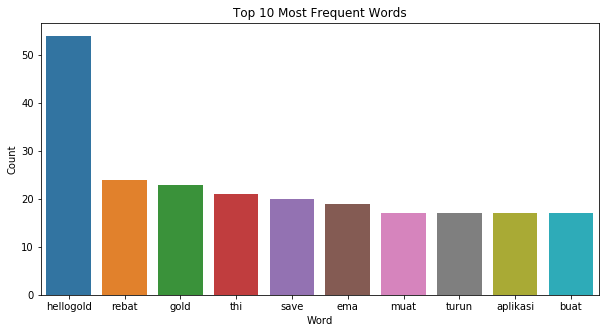

In [0]:
# Frequency Distribution

a = nltk.FreqDist(words)

b = pd.DataFrame({'Word': list(a.keys()), 'Count': list(a.values())})
length = len(b)

# Top 10 Most Frequent Words
b = b.nlargest(columns="Count", n = 10)
plt.figure(figsize=(10,5))
axis = sns.barplot(data=b, x='Word', y='Count')
axis.set(ylabel='Count')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [0]:
# Set type of polarity
polarity = []

for i in range(len(data)):
  if (data['Compound'][i] < 0):
    polarity.append("Negative")
  elif (data['Compound'][i] > 0):
    polarity.append("Positive")
  else:
    polarity.append("Neutral")
    
polarity = pd.DataFrame(polarity)
data['Polarity'] = polarity
data.head()

,Author,Content,Date,Url,Followers,Tidy_Content,Compound,Negative,Neutral,Positive,Polarity
0,miha_miharu,ดาวน์โหลดแอพ HelloGold แล้วซื้อทองคำมูลค่า 500...,Wed Sep 18 02:18:33 +0000 2019,"[{'url': 'https://t.co/deeUEgXbNw', 'expanded_...",27,hellogold xxxx,0.0000,0.0,1.000,0.000,Neutral
1,14ottobre2010,"Molto interessati? A casa loro, le stesse macc...",Wed Sep 11 11:24:55 +0000 2019,"[{'url': 'https://t.co/8UqTaeynpA', 'expanded_...",673,molto interessati casa loro stess macchinett q...,0.0000,0.0,1.000,0.000,Neutral
2,hazimdace,@myhellogold Muat turun aplikasi HelloGold. Bu...,Wed Sep 11 00:23:33 +0000 2019,"[{'url': 'https://t.co/5dYr33ySbh', 'expanded_...",17,muat turun aplikasi hellogold buat pembelian e...,0.0000,0.0,1.000,0.000,Neutral
3,rcfl1967,RT @myhellogold: We sat down with our friends ...,Wed Sep 04 14:50:08 +0000 2019,[],364,down with friend from mypf talk about gold hel...,0.4939,0.0,0.802,0.198,Positive
4,AlayyubMahazan,Muat turun aplikasi HelloGold sekarang. Buat p...,Wed Sep 04 14:37:26 +0000 2019,"[{'url': 'https://t.co/0KZfgV9qeL', 'expanded_...",452,muat turun aplikasi hellogold sekarang buat pe...,0.0000,0.0,1.000,0.000,Neutral


In [0]:
# DataFrame of mentions and polarity
# For every word, there's positive, negative, neutral, and combined

# Extract words
test = []
for i in range(len(data)):
  test = word_extract(data['Tidy_Content'])
  test.append(i)

# test = sum(test, [])
# test
# Unnesting list

# test = sum(test, [])
# test = pd.DataFrame(test)
# data['Words'] = test
# data['Words']

# Plot Bar Chart for Mentions and Polarity

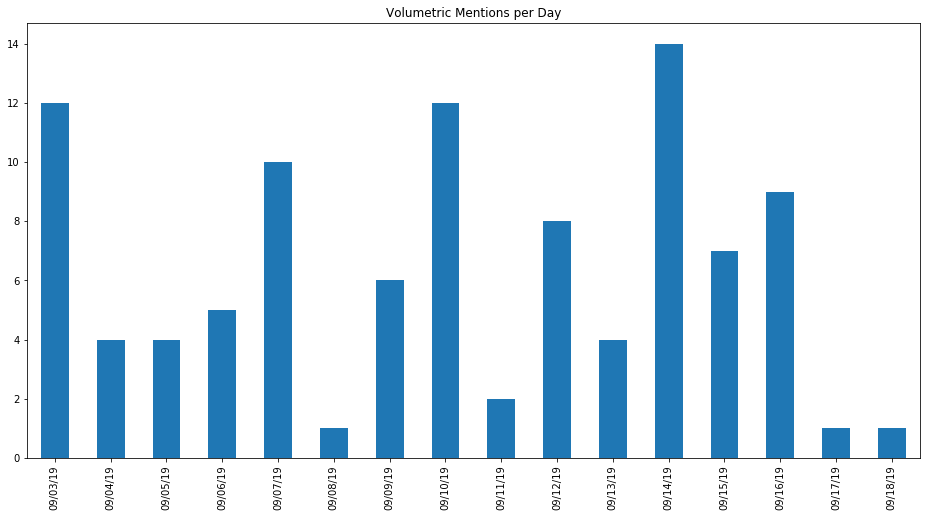

In [0]:
# Volumetric mentions of the word 'HelloGold' per day

# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame with column 'Mentions'
df = pd.DataFrame(columns=['Mentions'])

# Find occurences of tweets by date
df['Mentions'] = data['Date'].dt.strftime('%D').value_counts().sort_index().plot(kind='bar', title='Volumetric Mentions per Day', figsize=(16,8))

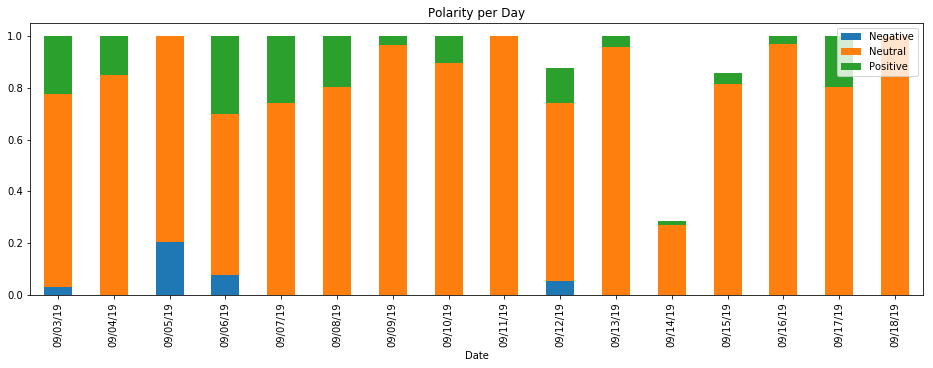

In [0]:
# Stacked bar chart of polarity

# Convert date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.strftime('%D')

x = data[['Date', 'Negative', 'Neutral', 'Positive']]
y = x.set_index('Date')
z = y.groupby('Date').mean()

z.plot.bar(stacked=True, title='Polarity per Day', figsize=(16,5))

IndexError: ignored

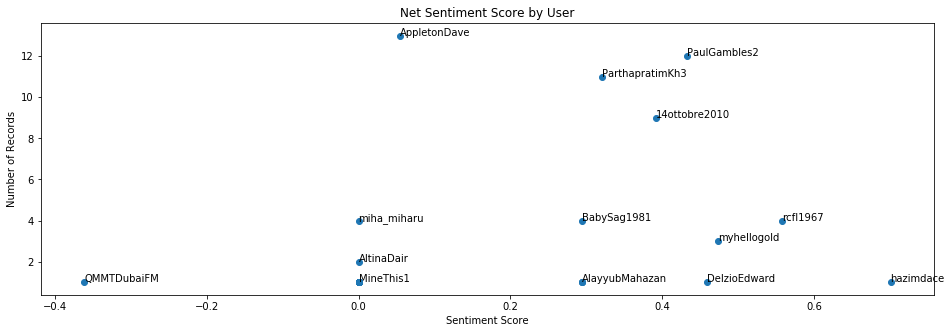

In [0]:
# Bubble chart of net sentiment score by user
# X-axis = sentiment score
# Y-axis = no of records
# bubbles = users

# Sentiment score

# Find unique values of column 'Author'
Unique = data.Author.unique()
len(Unique)

colors = np.random.rand(1502)

# No of records
df['User_Count'] = data['Author'].value_counts().sort_index()

df['Sentiment_Score'] = data.groupby('Author')['Compound'].mean()
 
fig, ax = plt.subplots(figsize=(16,5))
ax.scatter(df['Sentiment_Score'], df['User_Count'])
ax.title.set_text('Net Sentiment Score by User')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Number of Records')

df = df.drop_duplicates(['User_Count', 'Sentiment_Score'], keep='last')


for i, txt in enumerate(Unique):
    ax.annotate(txt, xy=(df['Sentiment_Score'][i], df['User_Count'][i]))
    
plt.savefig('test.png', bbox_inches="tight")
